her bir bilet için BUSINESS, LEISURE, SECOND HOME ve STUDENT yolculuk nedenlerini tahmin etmek
Oluşan sonuçların kullanım senaryolarına ilişkin açıklama yapmanız beklenmektedir. 

eda for numerical values
distribution for all variables
is there any outlier
any duplicate

eda- histograms- visualizations - boxplots 
look at feature importance and remove the unimportants


classification
class weights
different classifiers
tuning

https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/introduction.html
https://shap.readthedocs.io/en/latest/index.html

https://docs.rapids.ai/api/cudf/stable/        
https://www.kaggle.com/rohanrao/tutorial-on-reading-large-datasets?scriptVersionId=49328159&cellId=14

https://towardsdatascience.com/wisdom-of-the-crowd-voting-classifier-bagging-pasting-random-forest-and-extra-trees-289ef991e723

    

In [1]:
label =  ['FLIGHT_REASON']

categorical_str = [
'ARR',
'DEP',
'ID_PNR_ITI_CABCLASS_1',
'ID_PNR_ITI_CABCLASS_2',
'ID_PNR_ITI_SELCLASS_1',
'ID_PNR_ITI_SELCLASS_2',
'JRNY_TYP',
'NTNLT1' ] 

categorical_int = [
'arrival_interval_1',
'arrival_interval_2',
'flight_month_1',
'flight_month_2',
'flight_weekday_1',
'flight_weekday_2',
'pnr_create_month',
'pnr_create_weekday',
'pnr_workhour_interval']

numerical = [
'CUST_AGE',
'diff_pnr_firstflight', 
'diff_second_firstflight',
'flight_duration_1',
'flight_duration_2',
]

passthrough = [
'CHILD_FLG',
'FAMILY_FLG',
'INFANT_FLG',
'PET_FLG',
'POS_POC_SAME_FLG',
'SAME_SRNAME_FLG',
'SEAT_SELECT_FLG',
'SPORT_FLG',
'XBAG_FIRST_FLT_FLG',
'XBAG_LAST_FLT_FLG',
'XBAG_TWO_WAY_FLT_FLG',
'PNR_PSSG_COUNT',
'num_of_flights']

drops = [
'ID_PNR_CREATION_DTIME_GMT',
'ID_PNR_CREATION_YMD',
'ID_PNR_ITI_ARR_APT_1',
'ID_PNR_ITI_ARR_APT_2',
'ID_PNR_ITI_DEP_APT_1',
'ID_PNR_ITI_DEP_APT_2',
'ID_TKT_NO',
'OND',
'PNR_NO',
'date']

In [2]:
from pandas_profiling import ProfileReport
import pandas as pd

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
merged_df = pd.read_csv(r'C:\Users\IsmailKaraman\workspace\thy\data\p2\merged.csv', index_col='Unnamed: 0')
merged_df.shape

(1295571, 47)

In [5]:
merged_df = merged_df[categorical_str+categorical_int+numerical+passthrough+label]

In [6]:
len(merged_df.columns)

36

### drop duplicates

In [7]:
tmp_df = merged_df.copy()
tmp_df['values_nolabel']  = merged_df.drop(['FLIGHT_REASON'], axis=1).applymap(str).apply(' '.join, axis=1)
tmp_df['values_label']  = merged_df.applymap(str).apply(' '.join, axis=1)

In [8]:
no_label = tmp_df[tmp_df.duplicated(subset=['values_nolabel'])].index
with_label = tmp_df[tmp_df.duplicated(subset=['values_label'])].index

In [9]:
conflicts_indexes = merged_df.loc[list(set(no_label).difference(set(with_label)))].index
conflicts_indexes

Int64Index([1201984, 566526, 1110212, 1226264, 807898, 1247613, 1260318], dtype='int64')

In [10]:
all_conflict_indexes = []
for ind in conflicts_indexes:
    print(tmp_df[tmp_df['values_nolabel'] == tmp_df.loc[ind, 'values_nolabel']]['FLIGHT_REASON'])
    all_conflict_indexes.extend(list(tmp_df[tmp_df['values_nolabel'] == tmp_df.loc[ind, 'values_nolabel']].index))
    print('---')

898909      LEISURE
1201984    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
343385     LEISURE
566526    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
343581     BUSINESS
343703     BUSINESS
1110212     LEISURE
Name: FLIGHT_REASON, dtype: object
---
980116      LEISURE
1226264    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
638445     LEISURE
807898    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
357281         LEISURE
357282         LEISURE
1247613    SECOND HOME
Name: FLIGHT_REASON, dtype: object
---
868592      LEISURE
1260318    BUSINESS
Name: FLIGHT_REASON, dtype: object
---


In [11]:
merged_df.drop(conflicts_indexes, inplace=True)

In [12]:
merged_df.drop_duplicates(inplace=True)

In [13]:
merged_df.shape

(953652, 36)

In [14]:
merged_df.columns

Index(['ARR', 'DEP', 'ID_PNR_ITI_CABCLASS_1', 'ID_PNR_ITI_CABCLASS_2',
       'ID_PNR_ITI_SELCLASS_1', 'ID_PNR_ITI_SELCLASS_2', 'JRNY_TYP', 'NTNLT1',
       'arrival_interval_1', 'arrival_interval_2', 'flight_month_1',
       'flight_month_2', 'flight_weekday_1', 'flight_weekday_2',
       'pnr_create_month', 'pnr_create_weekday', 'pnr_workhour_interval',
       'CUST_AGE', 'diff_pnr_firstflight', 'diff_second_firstflight',
       'flight_duration_1', 'flight_duration_2', 'CHILD_FLG', 'FAMILY_FLG',
       'INFANT_FLG', 'PET_FLG', 'POS_POC_SAME_FLG', 'SAME_SRNAME_FLG',
       'SEAT_SELECT_FLG', 'SPORT_FLG', 'XBAG_FIRST_FLT_FLG',
       'XBAG_LAST_FLT_FLG', 'XBAG_TWO_WAY_FLT_FLG', 'PNR_PSSG_COUNT',
       'num_of_flights', 'FLIGHT_REASON'],
      dtype='object')

In [118]:
y = merged_df['FLIGHT_REASON']
X = merged_df[categorical_str+categorical_int+numerical+passthrough]

In [119]:
from imblearn.over_sampling import SMOTE

In [120]:
X.columns

Index(['ARR', 'DEP', 'ID_PNR_ITI_CABCLASS_1', 'ID_PNR_ITI_CABCLASS_2',
       'ID_PNR_ITI_SELCLASS_1', 'ID_PNR_ITI_SELCLASS_2', 'JRNY_TYP', 'NTNLT1',
       'arrival_interval_1', 'arrival_interval_2', 'flight_month_1',
       'flight_month_2', 'flight_weekday_1', 'flight_weekday_2',
       'pnr_create_month', 'pnr_create_weekday', 'pnr_workhour_interval',
       'CUST_AGE', 'diff_pnr_firstflight', 'diff_second_firstflight',
       'flight_duration_1', 'flight_duration_2', 'CHILD_FLG', 'FAMILY_FLG',
       'INFANT_FLG', 'PET_FLG', 'POS_POC_SAME_FLG', 'SAME_SRNAME_FLG',
       'SEAT_SELECT_FLG', 'SPORT_FLG', 'XBAG_FIRST_FLT_FLG',
       'XBAG_LAST_FLT_FLG', 'XBAG_TWO_WAY_FLT_FLG', 'PNR_PSSG_COUNT',
       'num_of_flights'],
      dtype='object')

In [121]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_str_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ])

categorical_int_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
    ])

preprocessor = ColumnTransformer(
                                transformers=[
                                              ('num', numeric_transformer, numerical),
                                              ('cat_str', categorical_str_transformer, categorical_str),
                                              ('cat_int', categorical_int_transformer, categorical_int),], 
                                remainder='passthrough')

In [122]:
remainder = list(set(X.columns) - set(numerical) - set(categorical_str) - set(categorical_int))
feature_names = numerical + categorical_str + categorical_int + remainder
feature_names

['CUST_AGE',
 'diff_pnr_firstflight',
 'diff_second_firstflight',
 'flight_duration_1',
 'flight_duration_2',
 'ARR',
 'DEP',
 'ID_PNR_ITI_CABCLASS_1',
 'ID_PNR_ITI_CABCLASS_2',
 'ID_PNR_ITI_SELCLASS_1',
 'ID_PNR_ITI_SELCLASS_2',
 'JRNY_TYP',
 'NTNLT1',
 'arrival_interval_1',
 'arrival_interval_2',
 'flight_month_1',
 'flight_month_2',
 'flight_weekday_1',
 'flight_weekday_2',
 'pnr_create_month',
 'pnr_create_weekday',
 'pnr_workhour_interval',
 'num_of_flights',
 'SAME_SRNAME_FLG',
 'SEAT_SELECT_FLG',
 'XBAG_FIRST_FLT_FLG',
 'POS_POC_SAME_FLG',
 'SPORT_FLG',
 'INFANT_FLG',
 'PNR_PSSG_COUNT',
 'FAMILY_FLG',
 'CHILD_FLG',
 'PET_FLG',
 'XBAG_TWO_WAY_FLT_FLG',
 'XBAG_LAST_FLT_FLG']

In [123]:
X_trs = preprocessor.fit_transform(X)

In [124]:
X_trs

array([[-0.4274010018906529, -0.6525477788255993, -0.46137852771244164,
        ..., 0, 1, 2],
       [0.36188001423227434, -0.6019718309288067, -0.2849919965501581,
        ..., 0, 1, 2],
       [-0.3059731532563564, 0.5233430097748286, -0.3437875069375859,
        ..., 0, 1, 2],
       ...,
       [-0.06311745598776339, -0.37438006539324004, -0.3437875069375859,
        ..., 0, 2, 2],
       [1.2725888789894981, -0.5766838569804105, -0.2849919965501581,
        ..., 0, 2, 2],
       [1.21187495467235, -0.5766838569804105, -0.2849919965501581, ...,
        0, 2, 2]], dtype=object)

In [125]:
X_trs[0]

array([-0.4274010018906529, -0.6525477788255993, -0.46137852771244164,
       1.0464716997028505, -1.32699924612841, 'IST', 'MXP', 'Y', 'Y', 'O',
       'Q', 'R', 'Italy', 2.0, 2.0, 11.0, 11.0, 3.0, 4.0, 11.0, 1.0, 1.0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2], dtype=object)

In [126]:
X_trs[0][range(5,35)]

array(['IST', 'MXP', 'Y', 'Y', 'O', 'Q', 'R', 'Italy', 2.0, 2.0, 11.0,
       11.0, 3.0, 4.0, 11.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2], dtype=object)

In [127]:

from imblearn.over_sampling import SMOTENC

sm = SMOTENC(random_state=42, categorical_features=range(5,35), sampling_strategy='minority', n_jobs=-1)
X_res, y_res = sm.fit_resample(X_trs, y)


In [128]:
X_res[0]

array([-0.4274010018906529, -0.6525477788255993, -0.46137852771244164,
       1.0464716997028505, -1.32699924612841, 'IST', 'MXP', 'Y', 'Y', 'O',
       'Q', 'R', 'Italy', 2.0, 2.0, 11.0, 11.0, 3.0, 4.0, 11.0, 1.0, 1.0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2], dtype=object)

In [129]:
X_res[-1]

array([-0.9575397710509561, -0.4699719077439328, 0.2126237291178798,
       -0.7542839771553096, 0.8697917008071746, 'FRA', 'IST', 'Y', 'Y',
       'G', 'G', 'R', 'Turkey', 1.0, 2.0, 4.0, 4.0, 0.0, 6.0, 3.0, 0.0,
       1.0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 9, 2], dtype=object)

In [130]:
len(X_res) - len(X)

429945

In [131]:
y_res.value_counts()

BUSINESS       431002
STUDENT        431002
LEISURE        290463
SECOND HOME    231130
Name: FLIGHT_REASON, dtype: int64

In [133]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
X.isna().sum()[X.isna().sum()>0]

ID_PNR_ITI_CABCLASS_2      129658
ID_PNR_ITI_SELCLASS_2      129658
NTNLT1                     272099
flight_month_2             129658
flight_weekday_2           129658
CUST_AGE                   260784
diff_second_firstflight    129658
flight_duration_2          129658
dtype: int64

In [136]:
X[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953652 entries, 0 to 1295570
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CUST_AGE                 692868 non-null  float64
 1   diff_pnr_firstflight     953652 non-null  int64  
 2   diff_second_firstflight  823994 non-null  float64
 3   flight_duration_1        953652 non-null  float64
 4   flight_duration_2        823994 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 43.7 MB


In [137]:
merged_df['ID_PNR_ITI_SELCLASS_2'].unique() 

array(['Q', 'P', 'U', nan, 'W', 'O', 'L', 'G', 'T', 'E', 'V', 'A', 'D',
       'J', 'Y', 'H', 'B', 'M', 'Z', 'X', 'C', 'S', 'K', 'I', 'N', '?',
       'R'], dtype=object)

In [138]:
(X[numerical]==-1).index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       9,      12,
            ...
            1295550, 1295552, 1295554, 1295555, 1295558, 1295563, 1295565,
            1295567, 1295569, 1295570],
           dtype='int64', length=953652)

In [139]:
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from imblearn.over_sampling import SMOTENC

In [140]:
cw = dict(zip(np.unique(y), compute_class_weight('balanced', np.unique(y), y)))

In [141]:
X_res = pd.DataFrame(data=X_res, columns=feature_names)
X_res

,CUST_AGE,diff_pnr_firstflight,diff_second_firstflight,flight_duration_1,flight_duration_2,ARR,DEP,ID_PNR_ITI_CABCLASS_1,ID_PNR_ITI_CABCLASS_2,ID_PNR_ITI_SELCLASS_1,...,XBAG_FIRST_FLT_FLG,POS_POC_SAME_FLG,SPORT_FLG,INFANT_FLG,PNR_PSSG_COUNT,FAMILY_FLG,CHILD_FLG,PET_FLG,XBAG_TWO_WAY_FLT_FLG,XBAG_LAST_FLT_FLG
0,-0.427401,-0.652548,-0.461379,1.046472,-1.326999,IST,MXP,Y,Y,O,...,0,0,0,0,0,0,0,0,1,2
1,0.36188,-0.601972,-0.284992,-0.539519,1.717073,AMS,IST,Y,Y,Y,...,0,1,0,0,0,0,0,0,1,2
2,-0.305973,0.523343,-0.343788,-1.633306,1.358947,MXP,IST,Y,Y,U,...,0,0,0,0,0,0,0,0,1,2
3,1.090447,-0.222652,-0.284992,1.648054,-0.312308,IST,LHR,C,None,J,...,0,0,0,0,0,0,0,0,1,1
4,-0.670257,0.106091,-0.284992,-0.047315,0.403944,LED,IST,Y,Y,E,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383592,-1.001418,-0.4376,-0.226196,-1.797374,1.120196,BLQ,IST,Y,Y,G,...,0,1,0,0,0,0,0,0,8,2
1383593,-1.754015,-0.045636,-0.402583,-0.812966,0.821758,GVA,IST,Y,Y,V,...,0,1,0,0,0,0,0,0,17,2
1383594,-1.063029,-0.557329,-0.284992,-0.867655,-0.312308,LHR,IST,Y,None,L,...,0,0,0,0,0,0,0,0,1,1
1383595,-1.441499,-0.349092,0.244168,-1.797374,1.179884,BLQ,IST,Y,Y,G,...,0,1,0,0,0,0,0,0,12,2


In [188]:
from sklearn.base import BaseEstimator, TransformerMixin

#Custom Transformer that extracts columns passed as argument to its constructor 
class SMOTETransformer(BaseEstimator, TransformerMixin):
    #Class Constructor 
    def __init__(self):
        self.smote = SMOTENC(random_state=42, categorical_features=range(5,456), 
                                              sampling_strategy='minority', n_jobs=-1)
    
    #Return self nothing else to do here    
    def fit(self, X, y):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y ):
        return self.smote.fit_resample(X, y)

In [192]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_str_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

categorical_int_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
                                transformers=[
                                              ('num', numeric_transformer, numerical),
                                              ('cat_str', categorical_str_transformer, categorical_str),
                                              ('cat_int', categorical_int_transformer, categorical_int),], 
                                remainder='passthrough')

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [196]:
smote = SMOTENC(random_state=42, categorical_features=range(5,X_train.shape[1]), 
                                              sampling_strategy='minority', n_jobs=-1)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [197]:
X_train.shape, y_train.shape

((927009, 456), (927009,))

In [200]:
cw = dict(zip(np.unique(y), compute_class_weight('balanced', np.unique(y_train), y_train)))

In [201]:
clf = RandomForestClassifier(class_weight=cw, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("training score: %.3f" % clf.score(X_train, y_train))
print("test score: %.3f" % clf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [ ]:
print(classification_report(y_test, y_pred))

In [150]:
%%time
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_str_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

categorical_int_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
                                transformers=[
                                              ('num', numeric_transformer, numerical),
                                              ('cat_str', categorical_str_transformer, categorical_str),
                                              ('cat_int', categorical_int_transformer, categorical_int),], 
                                remainder='passthrough')

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight=cw, n_jobs=-1))])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

clf.fit(X_train, y_train)
print("training score: %.3f" % clf.score(X_train, y_train))
print("test score: %.3f" % clf.score(X_test, y_test))

Wall time: 0 ns


In [159]:
range(5,456)[-1]

455

In [156]:
aa = clf.fit_transform(X_train)

In [157]:
aa.shape

(927009, 456)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, stratify=y_res, test_size=0.33, random_state=42)

clf.fit(X_train, y_train)
print("training score: %.3f" % clf.score(X_train, y_train))
print("test score: %.3f" % clf.score(X_test, y_test))

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BUSINESS       0.97      0.98      0.98    142231
     LEISURE       0.95      0.94      0.94     95853
 SECOND HOME       0.97      0.97      0.97     76273
     STUDENT       1.00      1.00      1.00    142231

    accuracy                           0.98    456588
   macro avg       0.97      0.97      0.97    456588
weighted avg       0.98      0.98      0.98    456588



In [143]:
y_pred = clf.predict(X_test)

In [145]:
stopp

NameError: name 'stopp' is not defined

In [ ]:
without class weights:
              precision    recall  f1-score   support

    BUSINESS       0.97      0.99      0.98    151336
     LEISURE       0.98      0.97      0.97    190324
 SECOND HOME       0.98      0.97      0.98     85474
     STUDENT       0.99      0.42      0.59       405

    accuracy                           0.98    427539
   macro avg       0.98      0.84      0.88    427539
weighted avg       0.98      0.98      0.98    427539

In [ ]:
merged_df.diff_pnr_firstflight

In [ ]:
new features
if we can use additional datasets
is NTNLT1 in arr or dep of oene of the flights 

In [ ]:
is it possible to flight before pnr

pnrs[pnrs['diff_pnr_firstflight']<0][['ID_PNR_ITI_DEP_YMD_1', 'ID_PNR_CREATION_DTIME_GMT', 'diff_pnr_firstflight']]

2. uçuşun 1. uçuştan önce olması mümkün mü?
pnrs[pnrs['diff_second_firstflight']==2][['ID_PNR_ITI_DEP_YMD_2', 'ID_PNR_ITI_DEP_YMD_1', 'diff_second_firstflight']]


In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

ConversionError: Failed to convert value(s) to axis units: 0           Y
1           Y
2           Y
3         NaN
4           Y
         ... 
953647      Y
953648      Y
953649      Y
953650      Y
953651      Y
Name: x, Length: 953652, dtype: object

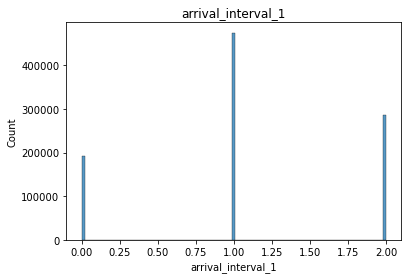

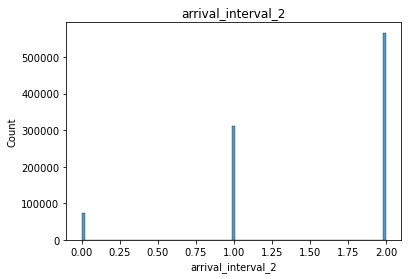

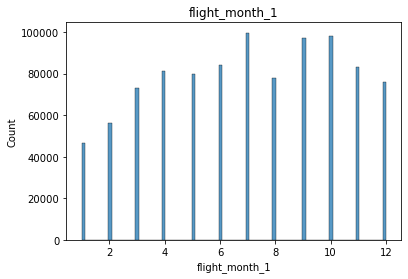

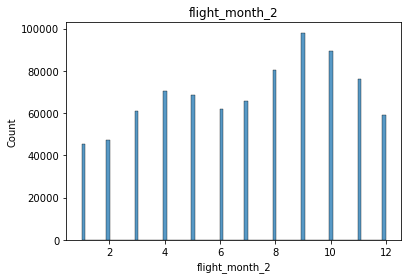

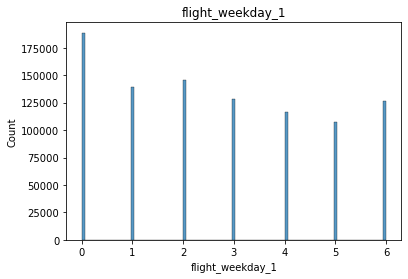

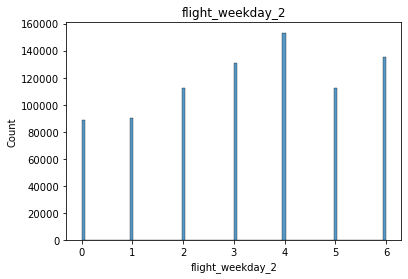

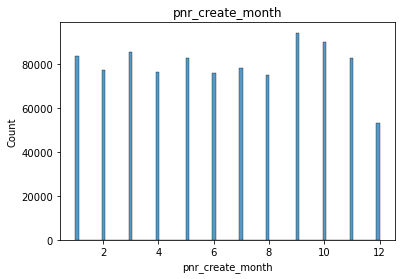

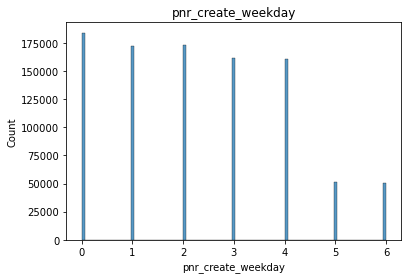

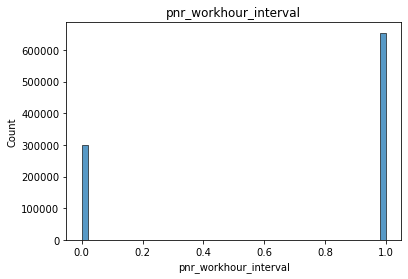

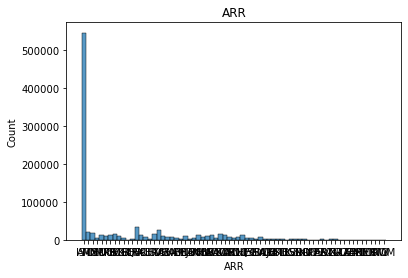

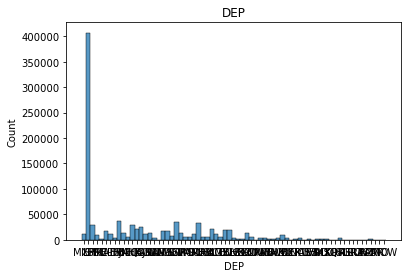

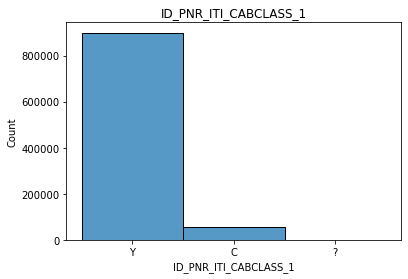

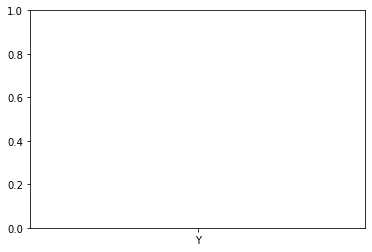

In [213]:
for i, col_cat in enumerate(categorical_int + categorical_str):
    plt.figure(i)
    sns.histplot(merged_df[col_cat]).set_title(col_cat)